# Assignment 7 - Pandas
Due Oct 19.

In this assignment we will use pandas to examine earthquake data.

Start by importing pandas, numpy and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I saved you some time by pre-downloading some data in .csv format from the USGS Earthquakes Database. It is located at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't even need to download it. You can open it directly with Pandas.

## 1) Use Pandas' read_csv function directly on this url to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
data = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')
df = pd.DataFrame(data)
df.head()

time   latitude  longitude  depth   mag magType  nst  \
0  2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml  NaN   
1  2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml  4.0   
2  2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml  NaN   
3  2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml  NaN   
4  2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml  6.0   

      gap     dmin     rms net          id                   updated  \
0     NaN      NaN  0.2900  ak  ak11155107  2014-02-05T19:34:41.515Z   
1  171.43  0.34200  0.0247  nn  nn00436847  2014-02-01T01:35:09.000Z   
2     NaN      NaN  1.0000  ak  ak11151142  2014-02-01T00:03:53.010Z   
3     NaN      NaN  1.0700  ak  ak11151135  2014-01-31T23:41:25.007Z   
4  285.00  0.04321  0.2000  ci  ci37171541  2014-02-01T00:13:20.107Z   

                               place        type  
0  26km S of Redoubt Volcano, Alaska  earthquake  
1            32km S of Alamo, Nevada  earthquake  
2   12km NNW of North Nenana, Alaska  earthquake  
3         22km S of Cantwell, Alaska  earthquake  
4       10km WNW of Progreso, Mexico  earthquake

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
time         120108 non-null object
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
id           120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


You should have seen that the dates were not automatically parsed into datetime types.

## 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index
Verify that this worked using the `head` and `info` functions.

In [4]:
data = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates=[0], index_col=11)
df = pd.DataFrame(data)
df.head()

time   latitude  longitude  depth   mag magType  \
id                                                                              
ak11155107 2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml   
nn00436847 2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml   
ak11151142 2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml   
ak11151135 2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml   
ci37171541 2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml   

            nst     gap     dmin     rms net                   updated  \
id                                                                       
ak11155107  NaN     NaN      NaN  0.2900  ak  2014-02-05T19:34:41.515Z   
nn00436847  4.0  171.43  0.34200  0.0247  nn  2014-02-01T01:35:09.000Z   
ak11151142  NaN     NaN      NaN  1.0000  ak  2014-02-01T00:03:53.010Z   
ak11151135  NaN     NaN      NaN  1.0700  ak  2014-01-31T23:41:25.007Z   
ci37171541  6.0  285.00  0.04321  0.2000  ci  2014-02-01T00:13:20.107Z   

                                        place        type  
id                                                         
ak11155107  26km S of Redoubt Volcano, Alaska  earthquake  
nn00436847            32km S of Alamo, Nevada  earthquake  
ak11151142   12km NNW of North Nenana, Alaska  earthquake  
ak11151135         22km S of Cantwell, Alaska  earthquake  
ci37171541       10km WNW of Progreso, Mexico  earthquake

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
time         120108 non-null datetime64[ns]
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


## 3) Use `describe` to get the basic statistics of all the columns
Note the highest and lowest magnitude of earthquakes in the databse.

In [6]:
df.describe()

latitude      longitude          depth            mag  \
count  120108.000000  120108.000000  120107.000000  120065.000000   
mean       38.399579     -99.961402      28.375029       1.793958   
std        21.938258      82.996858      62.215416       1.343466   
min       -73.462000    -179.998900      -9.900000      -0.970000   
25%        34.228917    -147.742025       4.100000       0.820000   
50%        38.805300    -120.832000       9.200000       1.400000   
75%        53.889500    -116.068100      22.880000       2.400000   
max        86.651400     179.998000     697.360000       8.200000   

                nst           gap          dmin            rms  
count  59688.000000  94935.000000  85682.000000  119716.000000  
mean      17.878284    124.048978      0.893198       0.358174  
std       14.911369     68.518595      2.903966       0.364046  
min        0.000000      9.000000      0.000000       0.000000  
25%        8.000000     74.000000      0.020760       0.070000  
50%       14.000000    107.000000      0.073670       0.200000  
75%       22.000000    155.000000      0.447000       0.590000  
max      365.000000    356.400000     64.498000       8.460000

In [7]:
df.mag.describe() # max is 8.2, min is -0.97

count    120065.000000
mean          1.793958
std           1.343466
min          -0.970000
25%           0.820000
50%           1.400000
75%           2.400000
max           8.200000
Name: mag, dtype: float64

## 4) Use `sort_values` to get the top 20 earthquakes by magnitude


In [8]:
df.sort_values('mag', ascending=False).head(20)

time  latitude  longitude   depth  mag magType  \
id                                                                             
usc000nzvd 2014-04-01 23:46:47.260  -19.6097   -70.7691   25.00  8.2     mww   
usc000rki5 2014-06-23 20:53:09.700   51.8486   178.7352  109.00  7.9     mww   
usc000p27i 2014-04-03 02:43:13.110  -20.5709   -70.4931   22.40  7.7     mww   
usc000phx5 2014-04-12 20:14:39.300  -11.2701   162.1481   22.56  7.6     mww   
usb000pr89 2014-04-19 13:28:00.810   -6.7547   155.0241   43.37  7.5     mww   
usc000piqj 2014-04-13 12:36:19.230  -11.4633   162.0511   39.00  7.4     mww   
usb000slwn 2014-10-14 03:51:34.460   12.5262   -88.1225   40.00  7.3     mww   
usb000pq41 2014-04-18 14:27:24.920   17.3970  -100.9723   24.00  7.2     mww   
usc000pft9 2014-04-11 07:07:23.130   -6.5858   155.0485   60.53  7.1     mww   
usc000sxh8 2014-11-15 02:31:41.720    1.8929   126.5217   45.00  7.1     mww   
usc000stdc 2014-11-01 18:57:22.380  -19.6903  -177.7587  434.00  7.1     mww   
usb000sk6k 2014-10-09 02:14:31.440  -32.1082  -110.8112   16.54  7.0     mww   
usc000rngj 2014-06-29 07:52:55.170  -55.4703   -28.3669    8.00  6.9     mww   
usb000rzki 2014-08-03 00:22:03.680    0.8295   146.1688   13.00  6.9     mww   
usc000rkg5 2014-06-23 19:19:15.940  -29.9772  -177.7247   20.00  6.9     mww   
usc000mnvj 2014-02-12 09:19:49.060   35.9053    82.5864   10.00  6.9     mww   
usb000ruzk 2014-07-21 14:54:41.000  -19.8015  -178.4001  615.42  6.9     mww   
usc000nzwm 2014-04-01 23:57:58.790  -19.8927   -70.9455   28.42  6.9     mww   
usb000r2hc 2014-05-24 09:25:02.440   40.2893    25.3889    6.43  6.9     mww   
usc000rr6a 2014-07-07 11:23:54.780   14.7240   -92.4614   53.00  6.9     mww   

            nst    gap   dmin   rms net                   updated  \
id                                                                  
usc000nzvd  NaN   23.0  0.609  0.66  us  2015-07-30T16:24:51.223Z   
usc000rki5  NaN   22.0  0.133  0.71  us  2015-04-18T21:54:08.699Z   
usc000p27i  NaN   44.0  1.029  0.82  us  2015-06-06T07:31:05.755Z   
usc000phx5  NaN   13.0  2.828  0.71  us  2015-04-18T21:54:27.398Z   
usb000pr89  NaN   16.0  3.820  1.25  us  2015-04-18T21:54:18.633Z   
usc000piqj  NaN   17.0  2.885  1.00  us  2015-08-13T19:29:13.018Z   
usb000slwn  NaN   18.0  1.078  0.70  us  2015-08-13T19:35:02.679Z   
usb000pq41  NaN   46.0  2.250  1.20  us  2015-08-13T19:30:39.599Z   
usc000pft9  NaN   21.0  3.729  0.88  us  2014-07-01T02:37:56.000Z   
usc000sxh8  NaN   18.0  1.397  0.71  us  2015-03-20T18:42:02.735Z   
usc000stdc  NaN   13.0  4.415  0.84  us  2015-01-20T09:03:09.040Z   
usb000sk6k  NaN   22.0  5.127  0.43  us  2015-08-13T19:31:44.129Z   
usc000rngj  NaN   25.0  4.838  0.76  us  2014-09-26T11:49:45.000Z   
usb000rzki  NaN   12.0  6.393  0.93  us  2014-10-29T19:52:55.000Z   
usc000rkg5  NaN   35.0  0.751  0.99  us  2014-09-19T17:23:16.000Z   
usc000mnvj  NaN   18.0  7.496  0.83  us  2015-01-30T23:03:45.902Z   
usb000ruzk  NaN   15.0  3.934  0.96  us  2014-10-17T21:12:13.000Z   
usc000nzwm  NaN  119.0  0.828  0.93  us  2014-05-29T23:32:13.000Z   
usb000r2hc  NaN   25.0  0.402  0.67  us  2015-01-28T09:17:17.266Z   
usc000rr6a  NaN   51.0  0.263  1.38  us  2015-01-28T13:08:13.282Z   

                                              place        type  
id                                                               
usc000nzvd                94km NW of Iquique, Chile  earthquake  
usc000rki5  19km SE of Little Sitkin Island, Alaska  earthquake  
usc000p27i                53km SW of Iquique, Chile  earthquake  
usc000phx5    93km SSE of Kirakira, Solomon Islands  earthquake  
usb000pr89     70km SW of Panguna, Papua New Guinea  earthquake  
usc000piqj     112km S of Kirakira, Solomon Islands  earthquake  
usb000slwn          74km S of Intipuca, El Salvador  earthquake  
usb000pq41             33km ESE of Petatlan, Mexico  earthquake  
usc000pft9    56km WSW of Panguna, Papua New Guinea  earthquake  
usc000sxh8      154km NW

Examine the structure of the place column. The country information seems to be in there. How would you get it out?


**ANSWER**:
>The country information is separated from the rest of the place information by a comma. Can extract it by splitting the string after a comma separator


## 5) Extract the country using Pandas text data functions
Add it as a new column to the dataframe. (Is it really just country? No, some rows have the name of a US state.)

**ANSWER**:
   > some rows are also just names of cities, or 

In [9]:
location = df.place.str.rsplit(', ',n=1).str.get(-1)
df['country']= location
df.head()

time   latitude  longitude  depth   mag magType  \
id                                                                              
ak11155107 2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml   
nn00436847 2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml   
ak11151142 2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml   
ak11151135 2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml   
ci37171541 2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml   

            nst     gap     dmin     rms net                   updated  \
id                                                                       
ak11155107  NaN     NaN      NaN  0.2900  ak  2014-02-05T19:34:41.515Z   
nn00436847  4.0  171.43  0.34200  0.0247  nn  2014-02-01T01:35:09.000Z   
ak11151142  NaN     NaN      NaN  1.0000  ak  2014-02-01T00:03:53.010Z   
ak11151135  NaN     NaN      NaN  1.0700  ak  2014-01-31T23:41:25.007Z   
ci37171541  6.0  285.00  0.04321  0.2000  ci  2014-02-01T00:13:20.107Z   

                                        place        type country  
id                                                                 
ak11155107  26km S of Redoubt Volcano, Alaska  earthquake  Alaska  
nn00436847            32km S of Alamo, Nevada  earthquake  Nevada  
ak11151142   12km NNW of North Nenana, Alaska  earthquake  Alaska  
ak11151135         22km S of Cantwell, Alaska  earthquake  Alaska  
ci37171541       10km WNW of Progreso, Mexico  earthquake  Mexico

## 6) Find the 10 states / countries with the highest number of earthquakes

In [10]:
df.groupby('country')['country'].count().sort_values(ascending=False).head(10)

country
California     44451
Alaska         33799
Oregon          3195
Nevada          2905
Washington      2788
Hawaii          2564
Puerto Rico     2286
Indonesia       2124
Oklahoma        2040
Montana         1991
Name: country, dtype: int64

## 7) Find the top 10 states / countries where the strongest and weakest earthquakes occured

In [11]:
weakest = df.sort_values('mag').groupby('country')['country'].head(1)
strongest = df.sort_values('mag', ascending=False).groupby('country')['country'].head(1)

weakest[weakest.index.intersection(strongest.index)[0:10]] # Finds first ten intersections between both Series

id
mb15917540                               Sierra Leone
mb15443691    Off the south coast of Northwest Africa
nc72230331               offshore Northern California
ld60076136                                    Vermont
ci11412602            3km WSW of Quarry at CUSHENBURY
ci11413778           1km ENE of Quarry at VICTORVILLE
ci11413530                 1km NNE of Quarry at BORON
ld60065226                               Rhode Island
pr14156010                      Virgin Islands region
nm021714b                                    Illinois
Name: country, dtype: object

It looks like US states are being treated differently from foreign countries. We would like to fix that.

How can we tell if a name is a US state name? Python has a package for that: https://pypi.python.org/pypi/us!

This is a good time to try installing a new package using pip. Pip is the original python package manager that predates conda. Basically conda is more oriented towards data science while pip is more general purpose. There are lots more packages on pip than on conda. You can read a comparision of these two utilities if you want to know more.

## 8) Install the `us` package using pip, either directly from the notebook or the command line
The shell command is `pip install us`.

In [12]:
!pip install us

## 9) Import the `us` package to verify your installation works

In [13]:
import us

## 10) Read the `us` documentation to figure out how to create a list of state names (all upper case)

In [14]:
# help(us)

In [15]:
StateNames=[str(item.name).upper() for item in us.states.STATES]
StateNames

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT OF COLUMBIA',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

## 11) Write a function to check whether a string is a US state name.
This function should not be case sensitive. It should also strip any whitespace out of the test string.

In [16]:
test_string = 'Ohio, London, mIsSiSsIpPi, K.F.C.'

In [17]:
def stateCheck(test_string):
    test_string = test_string.split(', ')
    matches = []
    result = None
    for i in range(len(test_string)):
        item = test_string[i].split(' ')
        if len(item) == 1:
            if any(test_string[i].upper() in s for s in StateNames):   
                print(test_string[i].upper()+' is a US state name')      #uncomment to see the print statements
                result = True
            else:                                             
                print(test_string[i].upper()+ ' is not a US state name')
                result = False
        if len(item) > 1:
            item = ' '.join(item)
            if any(item.upper() in s for s in StateNames):   
                print(item.upper()+' is a US state name') 
                result = True
            else:                                             
                print(item.upper()+ ' is not a US state name')
                results = False
    return result

stateCheck(test_string)


OHIO is a US state name
LONDON is not a US state name
MISSISSIPPI is a US state name
K.F.C. is not a US state name


False

## 12) Use Pandas' apply function to apply this to each row of the country name series
You should produce a new boolean series. (Hint: use dropna() to drop rows that have null values before calling apply.)

In [18]:
location = df['country'].dropna(axis=0, how='any')

In [19]:
booleanSeries = pd.Series(location.apply(stateCheck))
booleanSeries

ALASKA is a US state name
NEVADA is a US state name
ALASKA is a US state name
ALASKA is a US state name
MEXICO is a US state name
MEXICO is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
NEW ZEALAND is not a US state name
MISSOURI is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
MONTANA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
BRITISH VIRGIN ISLANDS is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
WASHINGTON is a US state name
PAPUA NEW GUINEA is not a US state name
OREGON is a US state name
CALIFORNIA 

ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
WASHINGTON is a US state name
CA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
IDAHO is a US state name
ALASKA is a US state name
ALASKA is a US state name
MEXICO is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
ALASKA is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
ALASKA is a US state name
WYOMING is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALI

CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
IDAHO is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
UTAH is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
MEXICO is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
GREECE is not a US state name
INDON

IDAHO is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEVADA is a US state name
CHINA is not a US state name
VANUATU is not a US state name
MONTANA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
OKLAHOMA is a US s

ALASKA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
MEXICO is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
IDAHO is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
CHRISTMAS ISLAND is not a US state name
PUERTO RICO is not a US state name
NEVADA is a US state name
PUERTO RICO is not a US state name
NEVADA is a US state name
UTAH is a US state name
PUERTO RICO is not a US state name
FIJI is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state

CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
ROMANIA is not a US state name
CHILE is not a US state name
NE

ALASKA is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CENTRAL MID-ATLANTIC RIDGE is not a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
MEXICO is a US state name
PHILIPPINES is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
GREECE is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
ALASKA is a US state name
ALASKA is a US state name
PHILIPPINES is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
RUSSIA is not a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
MAURITANIA is not a US 

CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
TENNESSEE is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
RUSSIA is not a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIF

MEXICO is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CAL

CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
MISSOURI is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
SOUTH INDIAN OCEAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US

CALIFORNIA is a US state name
CALIFORNIA is a US state name
TAJIKISTAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
 is a US state name
MONTANA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
MONTANA is a US state name
ALASKA is a US state name
DOMINICAN REPUBLIC is not a US state name
DOMINICAN REPUBLIC is not a US state name
ALASKA is a US state name
MONTANA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
OKLAHOMA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
NEVAD

CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
JAPAN REGION is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
WYOMING is a US state name
ALASKA is a US state name
CALIFORNIA is a US state n

CALIFORNIA is a US state name
ALASKA is a US state name
MONTANA is a US state name
NEW ZEALAND is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
IDAHO is a US state name
WYOMING is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
WYOMING is a US state name
IDAHO is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name


ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
MONTANA is a US state name
MONTANA is a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
COLORADO is a US state name
INDONESIA is not a US state name
CHINA is not a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US sta

INDIA is a US state name
INDIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
INDIA is a US state name
INDIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
INDIA is a US state name
INDIA is a US state name
INDIA is a US state name
ALASKA is a US state name
INDIA is a US state name
INDIA is a US state name
INDIA is a US state name
INDIA REGION is not a US state name
INDIA is a US state name
INDIA is a US state name
INDIA is a US state name
INDIA is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
INDIA is a US state name
INDIA is a US state name
ALASKA is a US state name
INDIA is a US state name
ALASKA is a US state name
INDIA 

ALASKA is a US state name
MID-INDIAN RIDGE is not a US state name
CALIFORNIA is a US state name
TONGA is not a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
MEXICO is a US state name
ALASKA is a US state name
ARGENTINA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALA

ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
KURIL ISLANDS is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
MONTANA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
OHIO is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
MONTANA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
OHIO is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALA

ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
VANUATU is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
JAPAN is not a US state name
WYOMING is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
MONTANA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
A

PAPUA NEW GUINEA is not a US state name
WALLIS AND FUTUNA is not a US state name
CALIFORNIA is a US state name
GUADELOUPE is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
MEXICO is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
RUSSIA is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON i

ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
SOLOMON ISLANDS is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is not a US state name
OREGON is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is n

CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ARKANSAS is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
MEXICO is a US state name
CHILE is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFO

CALIFORNIA is a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
SOLOMON ISLANDS is not a US state name
SOLOMON ISLANDS is not a US state name
ALASKA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
NICARAGUA is not a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
ALASKA is a US state name
ALASKA is a US state name
NICARAGUA is not a US state name
ALASKA is a US state name
ALASKA is a US state name
INDIAN OCEAN TRIPLE JUNCTION is not a US state name
HAWAII is a US state name
SOLOMON ISLANDS is not a US state name
CALIFORNIA is a US state name
ECUADOR is not a US state name
ALASKA is a US state name
SOLOMON ISLANDS is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NICARAGUA is not a US state name
SOLOMON ISLANDS is not a US state name
PHILIPP

ALASKA is a US state name
ALASKA is a US state name
CANADA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
MONTANA is a US state name
OKLAHOMA is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
OKLAHOMA is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
ALASKA is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
UTAH is a US state name
ALASKA is a US state name
ARGENTINA is not a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is not a US state name
OKLAHOMA is a US state name
WYOMING is a US state name
ALASKA

CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
ALASKA is a US state name
NEVADA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a 

ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
IRAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
MISSOURI is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
WESTERN MONTANA is not a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
OKLAHOMA is a US state name
VANUATU is not a US state name
MONTANA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFOR

CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEVADA is a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
WASHINGTON is a US state name
PUERTO RICO is not a US state name
UTAH is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
WASHINGTON is a US state name
FIJI is not a US state name
ALASKA is a US state name
SOLOMON ISLANDS is not a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
KANSAS is a US state name
ALASKA is a US state name
INDONESIA is not a US state name
ALASKA is a US state name
SOLOMON ISLANDS is not a US state name
ALASKA is a US state name
NEVADA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEVADA is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
INDONESIA is not a US st

OKLAHOMA is a US state name
KANSAS is a US state name
CENTRAL ALASKA is not a US state name
ALBANIA is not a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
SOLOMON ISLANDS is not a US state name
GUATEMALA is not a US state name
CENTRAL ALASKA is not a US state name
ALBANIA is not a US state name
NORTHERN ALASKA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CENTRAL EAST PACIFIC RISE is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a 

CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
 is a US state name
ALASKA is a US state name
RUSSIA is not a US state name
PANAMA is not a US state name
BRITISH VIRGIN ISLANDS is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
 is a US state name
EAST OF THE KURIL ISLANDS is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state 

UTAH is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
THAILAND is not a US state name
SOUTH SANDWICH ISLANDS is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
IRAN is not a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
SCOTIA SEA is not a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state name
SCOTIA SEA is not a US state name
UTAH is a US state name
UTAH is a US state name


ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
 is a US state name
ALASKA is a US state name
ALASKA is a US state name
IDAHO is a US state name
ALASKA is a US state name
CENTRAL MID-ATLANTIC RIDGE is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
MEXICO is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
JAPAN is not a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
SOLOMON ISLANDS is not a US state name
CALIFORNIA is a US state name
ARGENTINA is not a US state name
ALASKA is a US state name
NORTHERN MARIANA ISLANDS is not a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
NEW CALEDONIA is not a US state name
MONTANA is a US state name
C

CALIFORNIA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CANADA is not a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
PHILIPPINES is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NORTHERN MID-ATLANTIC RIDGE is not a US state name
U.S. VIRGIN ISLANDS is not a US state name
ALASKA is a US state name
ALASKA is a US state name
MONTANA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NEW ZEALAND is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
PUERTO RICO is not a US state name
JAPAN REGION is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US st

ALASKA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
ALASKA is a US state name
ALASKA PENINSULA is not a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
NEW ZEALAND is not a US state name
NEW ZEALAND is not a US state name
NEW ZEALAND is not a US state name
ALASKA is a US s

CALIFORNIA is a US state name
ALASKA is a US state name
NICARAGUA is not a US state name
TONGA is not a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
ALASKA is a US state name
WYOMING is a US state name
GREECE is not a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
ALASKA is a US state name
OFF THE WEST COAST OF NORTHERN SUMATRA is not a US state name
CHILE is not a US state name
HAWAII is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ETHIOPIA is not a US state name
GREECE is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA 

ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
BRITISH VIRGIN ISLANDS is not a US state name
ALASKA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEVADA is a US state name
PERU is not a US state name
ALASKA is a US state name
ALASKA is a US state name
INDONESIA is not a U

CALIFORNIA is a US state name
CENTRAL CALIFORNIA is not a US state name
CALIFORNIA is a US state name
CENTRAL ALASKA is not a US state name
ALASKA is a US state name
GREECE is not a US state name
VIRGINIA is a US state name
CANADA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
SOUTHEASTERN ALASKA is not a US state name
CENTRAL ALASKA is not a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
SOUTHERN ALASKA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
YEMEN is not a US state name
CALI

JAPAN is not a US state name
ALASKA is a US state name
KANSAS is a US state name
FIJI is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
ALASKA is a US state name
PHILIPPINES is not a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
INDONESIA is not a US state name
MEXICO is a US state n

CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
JAPAN is not a US state name
MONTANA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CHINA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
NEVADA is a US state name
ALASKA is a US state name
WASHINGTON is a US state name
MARTINIQUE is not a US state name
ALASKA is a 

OREGON is a US state name
OREGON is a US state name
OREGON is a US state name
MISSOURI is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
ALASKA is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
OREGON is a US state name
MONTANA is a US state name
PERU is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
SOUTHERN EAST PACIFIC RISE is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
ALASKA 

CALIFORNIA is a US state name
CALIFORNIA is a US state name
SOUTHEAST INDIAN RIDGE is not a US state name
ALASKA is a US state name
SAUDI ARABIA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
OREGON is a US state name
KURIL ISLANDS is not a US state name
OKLAHOMA is a US state name
JAPAN is not a US state name
TONGA is not a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
UTAH is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US sta

CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
ALASKA is a US state name
TONGA is not a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
RUSSIA is not a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
WASHINGTON is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US

ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
IRAN is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
ALASKA is a US state name
DOMINICAN REPUBLIC is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state

ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
SVALBARD AND JAN MAYEN is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
SVALBARD AND JAN MAYEN is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
VANUATU is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
WASHINGTON is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
WEST CHILE RISE is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORN

SOUTH SANDWICH ISLANDS is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
NEVADA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
PHILIPPINES is not a US state name
GUATEMALA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
OREGON is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
CHILE is not a

OREGON is a US state name
ALASKA is a US state name
ALASKA is a US state name
OREGON is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
ALASKA is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
ALASKA is a US state name
FIJI is not a US state name
OREGON is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
OREGON is a US state name
OREGON is a US state name
ALASKA is a US state name
OREGON is a US state name
ALASKA is a US state name
WASHINGTON is a US state name
ALASKA is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
INDONESIA is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
OREGON is a US state name
ALASKA is a US state name
OREGON is a U

CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
TURKEY is not a US state name
WASHINGTON is a US state name
SOLOMON ISLANDS is not a US state name
ALASKA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
SOLOMON ISLANDS is not a US state name
ALASKA is a US state name
JAPAN is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
CA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is 

NEVADA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
MONTANA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
SOLOMON ISLANDS is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
VERMONT is a US state name
TONGA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
NEVADA is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
TENNESSEE is a US state name
CALIFORNIA is a US state name
NICARAGUA is not a US state name
ALASKA is a US state name
MONGOLIA is not a US state name
NEVADA is a US state name
ALASKA is a US state name
WASHINGTON is a US state name
FIJI is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CA

OKLAHOMA is a US state name
ALASKA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
OREGON is a US state name
ALASKA is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
MONTANA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
OREGON is a US state name
ALASKA is a US state n

CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA

ALASKA is a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
BURMA is not a US state name
CALIFORNIA is a US state name
NICARAGUA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
JAPAN is not a US state name
ALASKA is a US state name
GUAM is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
NORTHERN MARIANA ISLANDS is not a US state name
ALASKA is a US state name
ALASKA is a US state name
HAWAII is a US state name
HAWAII is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
HAWAII is a US state name
INDONESIA is not a US state name
TRINIDAD AND

CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
JAPAN is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
BALLENY ISLANDS REGION is not a US state name
OREGON is a US state name
CANADA is not a US state name
NEVADA is a US state name
ALASKA is a US state name
U.S. VIRGIN ISLANDS is not a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
NEVADA is a US state name
U.S. VIRGIN ISLANDS is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name


ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CANADA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
MONTANA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
CALIFORNIA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
FEDERATED STATES OF MICRONESIA REGION is not a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
CALIFORNIA is a US s

CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
WASHINGTON is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
JAPAN is not a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
SAINT HELENA is not a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
CENTRAL CALIFORNIA is not a US state name
CALIFORNIA is a US st

CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
SOLOMON ISLANDS is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CANADA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEVADA is a US state name
ALASKA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
MONTANA is a US state name
ALASKA is a US state name
PHILIPPINES is not a US state name
CALIFORNIA is a US state name
ALASKA

ALASKA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEVADA is a US state name
KANSAS is a US state name
ALASKA is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
OKLAHOMA is a US state name
OKLAHOMA is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
NORTHERN MARIANA ISLANDS is not a US state name
ICELAND is no

ALASKA is a US state name
RUSSIA is not a US state name
IRAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
INDONESIA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
RUSSIA is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NORTHERN MARIANA ISLANDS is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
ALASKA is a US state name
MONTANA is a US sta

CALIFORNIA is a US state name
CALIFORNIA is a US state name
SCOTIA SEA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
SOUTH SANDWICH ISLANDS is not a US state name
EASTERN MONTANA is not a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
INDONESIA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
PUERTO RICO is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
FIJI is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
RUSSIA is not a US state name
CALIFORNIA is a 

ICELAND is not a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US state name
PAPUA NEW GUINEA is not a US state name
PAPUA NEW GUINEA is not a US state name
WASHINGTON is a US state name
KANSAS is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
SOLOMON ISLANDS is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
IRAN is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
BRITISH VIRGIN ISLANDS is not a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
PHILIPPINES is not a US state name
CALIFORNIA is a US state name
SOLOMON ISLANDS is not a

CALIFORNIA is a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
OREGON is a US state name
CARLSBERG RIDGE is not a US state name
ALASKA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
PAPUA NEW GUINEA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
IDAHO is a US state name
ALASKA is a US state name
TONGA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
IDAHO is a US state name
OREGON is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
NORTHERN MARIANA ISLANDS is not a US state name


CALIFORNIA is a US state name
CHILE is not a US state name
OREGON is a US state name
INDONESIA is not a US state name
BOLIVIA is not a US state name
OREGON is a US state name
CHILE is not a US state name
WYOMING is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
KANSAS is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
KANSAS is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
INDONESIA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
INDONESIA is not a US state name
UTAH is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is

OREGON is a US state name
NEVADA is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
SOLOMON ISLANDS is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ICELAND is not a US state name
CALIFORNIA is a US state name
CHILE is not a US state name
SOLOMON ISLANDS is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
NORTHERN MARIANA ISLANDS is not a US state name
ALASKA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
MEXICO is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ARGENTINA is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
IN

CALIFORNIA is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
WASHINGTON is a US state name
OREGON is a US state name
OREGON is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
BRITISH VIRGIN ISLANDS is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNI

CALIFORNIA is a US state name
ALASKA is a US state name
ICELAND is not a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
JAPAN is not a US state name
OREGON is a US state name
PORTUGAL is not a US state name
TAJIKISTAN is not a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
JAPAN is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
MEXICO is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
NEVADA is a US state name
ALASKA is a US state name
HAWAII is a US state name
OREGON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
OREGON is a US state name
ALASKA is a US state name
INDIA is a US state name
OREGON is a US state name
HAWAII is a US state name
OREGON is a US state n

OKLAHOMA is a US state name
FIJI is not a US state name
OKLAHOMA is a US state name
OKLAHOMA is a US state name
FIJI is not a US state name
ALASKA is a US state name
FIJI is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
IDAHO is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ICELAND is not a US state name
OREGON is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
TONGA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
FIJI is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
WEST OF MACQUARIE ISLAND is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
MONTANA is a US 

ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
PAPUA NEW GUINEA is not a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
ALASKA is a US state name
UTAH is a US state name
OREGON is a US state name
OREGON is a US state name
PAPUA NEW GUINEA is not a US state name
OREGON is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
NEW CALEDONIA is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
UTAH is a US state name
OKLAHOMA is a US state name
NEVADA is a US state name
ALASKA is a US state name
MONTANA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
 is a US state name
CALIFORNIA is a US state name
COLOMBIA is not a US state name
CALIFORNIA is a US state name
ALASKA is a

PAPUA NEW GUINEA is not a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WYOMING is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
ICELAND is not a US state name
ALASKA is a US state name
OREGON is a US state name
JAPAN REGION is not a US state name
ALASKA is a US state name
ALASKA is a US state name
OREGON is a US state name
ALASKA is a US state name
WYOMING is a US state name
ALASKA is a US state name
OREGON is a US state name
ALASKA is a US state name
OREGON is a US state name
SOUTH OF THE FIJI ISLANDS is not a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
OKLAHOMA is a US state name
CALIFORNIA is a US state name
PHILIPPINES is not a US state 

VENEZUELA is not a US state name
NEW ZEALAND is not a US state name
ALASKA is a US state name
HAWAII is a US state name
ALASKA is a US state name
HAWAII is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
WASHINGTON is a US state name
WASHINGTON is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
GUATEMALA is not a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
NEVADA is a US state name
ALASKA is a US state name
MID-INDIAN RIDGE is not a US state name
JAPAN is not a US state name
CALIFORNIA is a US state name
HAWAII is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state

ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
KANSAS is a US state name
WYOMING is a US state name
NEW CALEDONIA is not a US state name
ALASKA is a US state name
WYOMING is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
PUERTO RICO is not a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
CALIFORNIA is a US state name
OKLAHOMA is a US state name
ALASKA is a US state name
NEW ZEALAND is not a US state name
ALASKA is a US state name
JAPAN is not a US state name
PHILIPPINES is not a US state name
OREGON is a US state name
ALASKA is a US state name
ALASKA is a US state name
JAPAN is not a US state name
NEVADA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state name
ALASKA is a US state name
ALASKA is a US state name
CALIFORNIA is a US state name
ALASKA is a US state na

id
ak11155107     True
nn00436847     True
ak11151142     True
ak11151135     True
ci37171541     True
ci11419722     True
ci11419714     True
ak11151127     True
ak11151125     True
nc72153361     True
usc000mqlp     None
ak11155101     True
nc72153351     True
nc72153356     True
usc000mqln     None
nm020414a      True
usc000mqls     None
ci11419698     True
ci11419706     True
ak11151102     True
nc72153341     True
mb14328395     True
ci11419690     True
nc72153331     True
pr14031002     None
ak11151084     True
usc000mf1x     True
ci11419682     True
ci11419674     True
ak11151076     True
              ...  
usb000t1ww     True
nc72358491     True
ci37065311     True
nc72358486     True
hv60809571     True
uw60926197     True
nc72358481     True
mb14712763     True
nm60020625     True
mb14923536     True
ak11453419     True
ak11453418     True
usc000t6y1    False
nc72358471     True
nc72358476     True
nc72358466     True
nc72358461     True
ci37065303     True
ak11453417     Tr

## 13) reindex this boolean series to match the dataframe's index
Fill the null values with False using .fillna().


In [20]:
boolean_df = pd.DataFrame(booleanSeries.reindex(df.index)).fillna(value=False,axis=1)
boolean_df

country
id                 
ak11155107     True
nn00436847     True
ak11151142     True
ak11151135     True
ci37171541     True
ci11419722     True
ci11419714     True
ak11151127     True
ak11151125     True
nc72153361     True
usc000mqlp    False
ak11155101     True
nc72153351     True
nc72153356     True
usc000mqln    False
nm020414a      True
usc000mqls    False
ci11419698     True
ci11419706     True
ak11151102     True
nc72153341     True
mb14328395     True
ci11419690     True
nc72153331     True
pr14031002    False
ak11151084     True
usc000mf1x     True
ci11419682     True
ci11419674     True
ak11151076     True
...             ...
usb000t1ww     True
nc72358491     True
ci37065311     True
nc72358486     True
hv60809571     True
uw60926197     True
nc72358481     True
mb14712763     True
nm60020625     True
mb14923536     True
ak11453419     True
ak11453418     True
usc000t6y1    False
nc72358471     True
nc72358476     True
nc72358466     True
nc72358461     True
ci37065303     True
ak11453417     True
ak11453416     True
usb000t1gp    False
ak11453414     True
usc000t6yn    False
ak11453410     True
ak11453411     True
ak11453391     True
ak11453395     True
nc72358451     True
ak11453390     True
ak11453389     True

[120108 rows x 1 columns]

## 14) Now re-assign the country column in the DataFrame to USA if the row is a state.
Also add the state name as a new column.

In [21]:
values = []
index = []
for i in range(len(booleanSeries.values)):
    if booleanSeries.values[i]:
        values.append(df['country'][i])
        index.append(df['country'].index[i])
        location.iloc[i] = 'USA'


In [22]:
df['country'] = location
df['State'] = pd.Series(data=values,index=index,name='State')
df.head()

time   latitude  longitude  depth   mag magType  \
id                                                                              
ak11155107 2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml   
nn00436847 2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml   
ak11151142 2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml   
ak11151135 2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml   
ci37171541 2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml   

            nst     gap     dmin     rms net                   updated  \
id                                                                       
ak11155107  NaN     NaN      NaN  0.2900  ak  2014-02-05T19:34:41.515Z   
nn00436847  4.0  171.43  0.34200  0.0247  nn  2014-02-01T01:35:09.000Z   
ak11151142  NaN     NaN      NaN  1.0000  ak  2014-02-01T00:03:53.010Z   
ak11151135  NaN     NaN      NaN  1.0700  ak  2014-01-31T23:41:25.007Z   
ci37171541  6.0  285.00  0.04321  0.2000  ci  2014-02-01T00:13:20.107Z   

                                        place        type country   State  
id                                                                         
ak11155107  26km S of Redoubt Volcano, Alaska  earthquake     USA  Alaska  
nn00436847            32km S of Alamo, Nevada  earthquake     USA  Nevada  
ak11151142   12km NNW of North Nenana, Alaska  earthquake     USA  Alaska  
ak11151135         22km S of Cantwell, Alaska  earthquake     USA  Alaska  
ci37171541       10km WNW of Progreso, Mexico  earthquake     USA  Mexico

## 15) Now redo the country count and minimum magnitdue using the corrected data

In [23]:
df['country'].describe()

count     120108
unique       284
top          USA
freq       99316
Name: country, dtype: object

In [24]:
df['mag'].describe()

count    120065.000000
mean          1.793958
std           1.343466
min          -0.970000
25%           0.820000
50%           1.400000
75%           2.400000
max           8.200000
Name: mag, dtype: float64

In [25]:
df.sort_values('mag')['country'].head(1) # the min mag entry

id
uw60944536    USA
Name: country, dtype: object

## 16) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [26]:
large = df.mag >= 4
df[large]

time  latitude  longitude   depth  mag magType  \
id                                                                             
usc000mqlp 2014-01-31 23:08:03.660   -4.9758   153.9466  110.18  4.2      mb   
usc000mqln 2014-01-31 22:54:32.970  -28.1775  -177.9058   95.84  4.3      mb   
usc000mqls 2014-01-31 22:49:49.740  -23.1192   179.1174  528.34  4.4      mb   
usc000mf1x 2014-01-31 22:19:44.330   51.1569  -178.0910   37.50  4.2      mb   
usc000mqlm 2014-01-31 21:56:44.320   -4.8800   153.8434  112.66  4.3      mb   
ak11151037 2014-01-31 21:20:54.000   58.0887  -151.6567   45.60  4.0      ml   
usc000mez1 2014-01-31 21:20:29.390   -4.9036   153.7511  104.58  4.7      mb   
usc000meyz 2014-01-31 21:13:58.930  -16.2100   178.2133   30.99  4.5      mb   
usc000mqlr 2014-01-31 20:03:27.610  -65.1289   178.8636    9.95  4.8      mb   
usc000mqlq 2014-01-31 20:00:16.000  -33.6550   -71.9810   25.10  4.5      mb   
usc000met1 2014-01-31 19:19:46.340    2.5005    95.7350   28.91  4.3      mb   
usc000mesc 2014-01-31 18:36:11.810    1.5254   126.3199   37.78  4.5      mb   
usc000mqlg 2014-01-31 18:15:33.900  -11.8678   166.6535  145.38  4.8      mb   
usc000mqlf 2014-01-31 18:05:24.080    9.0262   138.4600   34.19  4.4      mb   
usc000men8 2014-01-31 16:39:06.990   54.6664   159.5622  169.22  5.1      mb   
usc000mh8c 2014-01-31 16:04:05.800   16.6660   -94.8550   96.10  4.1      mb   
usc000mql8 2014-01-31 14:30:44.120    0.0211   123.1651  157.96  4.4      mb   
usc000mql9 2014-01-31 14:21:48.220    0.2122   122.0167  209.41  4.1      mb   
usc000mqla 2014-01-31 14:19:57.320    3.7584   126.3468   30.59  4.2      mb   
usc000mql7 2014-01-31 13:54:32.610   -5.5071   147.2850  203.04  4.4      mb   
usc000mql6 2014-01-31 13:48:23.000  -18.0690   -69.6630  149.10  4.3      mb   
usc000mqlc 2014-01-31 12:55:38.560  -21.5226   -66.6468  210.61  4.1      mb   
usc000medg 2014-01-31 12:45:41.100   38.4240    20.4550    7.30  4.5      mb   
usc000medi 2014-01-31 12:31:29.820   29.3574   130.2964   45.20  4.4      mb   
usc000med0 2014-01-31 11:46:56.280   -4.8292   153.8656  100.21  4.5      mb   
usc000meck 2014-01-31 11:40:46.400   32.5390    50.0100    8.50  4.6      mb   
usc000mql4 2014-01-31 11:10:21.950  -27.4725  -177.5265  111.51  4.5      mb   
usc000mql3 2014-01-31 11:04:26.610   -4.8709   154.0218   85.24  4.1      mb   
usc000mql2 2014-01-31 10:54:11.950  -25.5610  -178.6477  371.19  4.2      mb   
usc000mql1 2014-01-31 09:22:51.350  -17.8873  -178.6270  551.93  4.2      mb   
...                            ...       ...        ...     ...  ...     ...   
usb000t1k5 2014-12-01 16:36:57.500    1.8969   126.4076   35.00  4.8      mb   
usc000t6yt 2014-12-01 15:38:37.180   -6.3017   150.5043   45.80  4.2      mb   
usb000t1js 2014-12-01 15:09:09.920   -4.8007   102.9977   68.59  4.8      mb   
usc000t6yx 2014-12-01 14:29:20.970   64.4083   -17.7963    7.37  4.3      mb   
usc000t6y6 2014-12-01 14:12:32.350  -37.7298   179.3740   51.86  4.5      mb   
usc000t6y5 2014-12-01 13:18:53.860  -29.7923  -176.1122   38.08  4.3      mb   
usb000t1j2 2014-12-01 13:04:24.470  -48.8526   164.4453   21.00  5.7     mww   
usb000t1jx 2014-12-01 13:04:12.100  -48.7603   164.3688   10.00  4.6      mb   
usb000t1iw 2014-12-01 12:52:35.060   64.5267   -17.5999    6.09  5.4     mww   
usb000t1ij 2014-12-01 11:06:34.680    5.3972   126.6514   61.23  5.2      mb   
usc000t6ym 2014-12-01 10:44:49.470  -19.1712  -172.8824   22.87  4.6      mb   
usb000t1ig 2014-12-01 10:25:16.100  -21.6482   131.1734   10.00  4.5      mb   
usb000t1hu 2014-12-01 07:07:51.840   -6.7465   128.1161  295.86  4.6      mb   
usc000t6y3 2014-12-01 06:26:52.920  -60.3844   -28.6431   35.00  4.3      mb   
usb000t1hf 2014-12-01 05:57:37.030   35.0423  -111.7276    5.00  4.7     mww   
usb000t1hd 2014-12-01 05:25:14.950   64.6464   -17.4698    8.02  4.4      mb   
usc000t6yp 2014-12-01 04:58:27.800   15.0486   -61.3463  143.95  4.1      mb   
usc000t6yw 2014-12-01 04:58:03

## 17) Analyze the distribution of the Earthquake magnitudes in the filtered distribution
Make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see?

fig, ax = plt.subplots() df_filt.hist('mag', bins=20, ax=ax) ax.set_yscale('log')

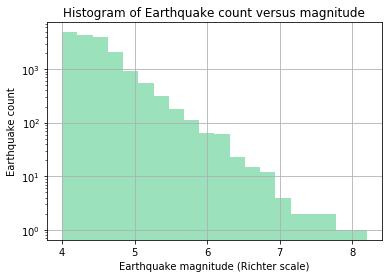

In [27]:
fig = plt.figure(figsize=(6,4))
p = df[large]['mag'].hist(color=[89/255,205/255,144/255],alpha=0.6,bins=20)
p.set_yscale('log')
p.set_ylabel('Earthquake count')
p.set_xlabel('Earthquake magnitude (Richter scale)')
p.set_title('Histogram of Earthquake count versus magnitude');

**ANSWER**:
>The relationship between log(count) and Richter scale is sort of linear.

## 18) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

Use the filtered data. Color it by magnitude. Make it pretty

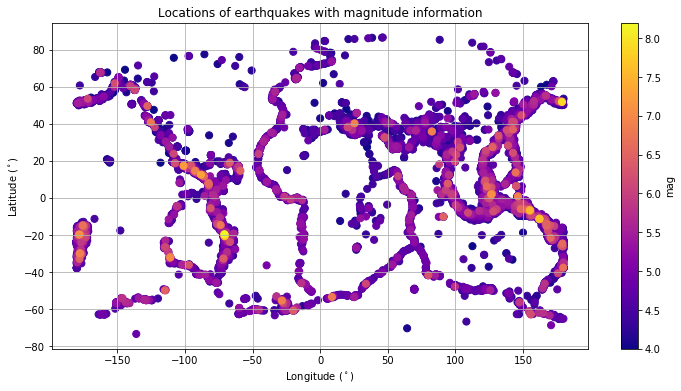

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
h = df[large].sort_values('mag').plot(ax=ax, kind='scatter', x='longitude', y='latitude', c='mag', s=50, colormap='plasma',grid=True)
ax.set_ylabel('Latitude ($^\circ$)')
ax.set_xlabel('Longitude ($^\circ$)')
ax.set_title('Locations of earthquakes with magnitude information')

## 19) Do the same for depth

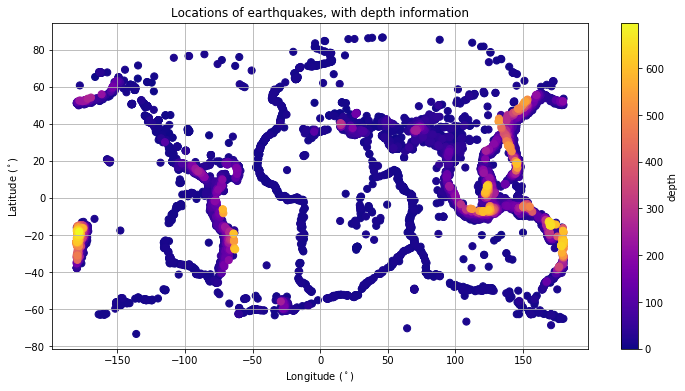

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
h = df[large].sort_values('depth').plot(ax=ax, kind='scatter', x='longitude', y='latitude', c='depth', s=50, colormap='plasma',grid=True)
ax.set_ylabel('Latitude ($^\circ$)')
ax.set_xlabel('Longitude ($^\circ$)')
ax.set_title('Locations of earthquakes, with depth information')


> Looks like the strongest earthquakes, were also some of the deepest earthquakes.